In [119]:
# Probabilities of drawing 2 aces from a standard 52 cards desk without replacement

# Total number of cards in a desk
total_cards = 52

# Total number of Aces in the desk
aces = 4

In [16]:
# Probability of drawing an ace first
prob_first_ace = aces / total_cards

In [28]:
# After drawing one Ace i have 3 aces left and 51 cards
prob_second_ace_given_first = (aces - 1) / (total_cards - 1)

In [32]:
# Total probability of drawing 2 Aces in a row without replacement
total_probability = prob_first_ace * prob_second_ace_given_first

In [40]:
# Result

print(f"Probability of first Ace: {prob_first_ace:.4f}")
print(f"Probability of second Ace given first: {prob_second_ace_given_first:.4f}")
print(f"Probability of 2 Aces: {total_probability:.4f} ({total_probability * 100:.2f}%)")

Probability of first Ace: 0.0769
Probability of second Ace given first: 0.0588
Probability of 2 Aces: 0.0045 (0.45%)


In [66]:
# Monte Carlo Simulation – Drawing 2 Aces

import random

# Function to simulate drawing 2 cards and checking if both are Aces
def simulate_draw():
    # Create a deck: 4 Aces + 48 other cards
    deck = ['Ace'] * 4 + ['Other'] * 48
    random.shuffle(deck)
    
    # Draw the first two cards
    draw = deck[:2]
    
    # Check if both are Aces
    return draw[0] == 'Ace' and draw[1] == 'Ace'

# Number of simulations
trials = 100_000
successes = 0

# Run simulations
for _ in range(trials):
    if simulate_draw():
        successes += 1

# Estimate probability
estimated_probability = successes / trials

In [68]:
# Results
print(f"Simulated probability of drawing 2 Aces in a row: {estimated_probability:.4f}")
print(f"Out of {trials} simulations, succeeded {successes} times")

Simulated probability of drawing 2 Aces in a row: 0.0046
Out of 100000 simulations, succeeded 460 times


In [78]:
# "Three of a Kind"

import random
from collections import Counter

# Define ranks and suits
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
suits = ['♠', '♥', '♦', '♣']

# Build a full deck
deck = [rank + suit for rank in ranks for suit in suits]

def is_three_of_a_kind(hand):
    # Count occurrences of each rank
    rank_counts = Counter(card[:-1] for card in hand)
    return 3 in rank_counts.values() and list(rank_counts.values()).count(2) == 0

# Monte Carlo simulation
trials = 100_000
successes = 0

for _ in range(trials):
    hand = random.sample(deck, 5)
    if is_three_of_a_kind(hand):
        successes += 1

estimated_prob = successes / trials

print(f"Estimated probability of Three of a Kind: {estimated_prob:.4f}")
print(f"Successes: {successes} / {trials}")


Estimated probability of Three of a Kind: 0.0215
Successes: 2147 / 100000


In [80]:
# Reusable Monte Carlo Poker Simulation framework

import random
from collections import Counter

# Define ranks and suits
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
suits = ['♠', '♥', '♦', '♣']
deck = [rank + suit for rank in ranks for suit in suits]

# Utility to get just the ranks and suits
def get_ranks(hand):
    return [card[:-1] for card in hand]

def get_suits(hand):
    return [card[-1] for card in hand]

# Hand check functions
def is_pair(hand):
    counts = Counter(get_ranks(hand)).values()
    return 2 in counts and list(counts).count(2) == 1

def is_two_pair(hand):
    counts = Counter(get_ranks(hand)).values()
    return list(counts).count(2) == 2

def is_three_of_a_kind(hand):
    counts = Counter(get_ranks(hand)).values()
    return 3 in counts and not is_full_house(hand)

def is_straight(hand):
    ranks_map = {r: i for i, r in enumerate(ranks)}
    rank_indices = sorted([ranks_map[r] for r in get_ranks(hand)])
    # Handle Ace-low straight (A, 2, 3, 4, 5)
    if rank_indices == [0, 1, 2, 3, 12]:
        return True
    return all(rank_indices[i] + 1 == rank_indices[i+1] for i in range(4))

def is_flush(hand):
    return len(set(get_suits(hand))) == 1

def is_full_house(hand):
    counts = Counter(get_ranks(hand)).values()
    return 3 in counts and 2 in counts

def is_four_of_a_kind(hand):
    counts = Counter(get_ranks(hand)).values()
    return 4 in counts

# Monte Carlo Simulator
def simulate(hand_check_function, trials=100_000):
    success = 0
    for _ in range(trials):
        hand = random.sample(deck, 5)
        if hand_check_function(hand):
            success += 1
    probability = success / trials
    print(f"Estimated probability of {hand_check_function.__name__}: {probability:.4f} ({success} / {trials})")

# Example: Simulate different hand types
simulate(is_pair)
simulate(is_two_pair)
simulate(is_three_of_a_kind)
simulate(is_straight)
simulate(is_flush)
simulate(is_full_house)
simulate(is_four_of_a_kind)


Estimated probability of is_pair: 0.4234 (42338 / 100000)
Estimated probability of is_two_pair: 0.0471 (4711 / 100000)
Estimated probability of is_three_of_a_kind: 0.0215 (2150 / 100000)
Estimated probability of is_straight: 0.0042 (421 / 100000)
Estimated probability of is_flush: 0.0019 (188 / 100000)
Estimated probability of is_full_house: 0.0015 (152 / 100000)
Estimated probability of is_four_of_a_kind: 0.0003 (32 / 100000)


In [91]:
# Create CSV file with the last results

import csv
import random
from collections import Counter

# Deck setup
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
suits = ['♠', '♥', '♦', '♣']
deck = [rank + suit for rank in ranks for suit in suits]

def get_ranks(hand): return [card[:-1] for card in hand]
def get_suits(hand): return [card[-1] for card in hand]

# Hand checkers
def is_pair(h): return list(Counter(get_ranks(h)).values()).count(2) == 1
def is_two_pair(h): return list(Counter(get_ranks(h)).values()).count(2) == 2
def is_three_of_a_kind(h): return 3 in Counter(get_ranks(h)).values() and not is_full_house(h)
def is_straight(h):
    ranks_map = {r: i for i, r in enumerate(ranks)}
    vals = sorted([ranks_map[r] for r in get_ranks(h)])
    return vals == list(range(vals[0], vals[0] + 5)) or vals == [0, 1, 2, 3, 12]
def is_flush(h): return len(set(get_suits(h))) == 1
def is_full_house(h): c = Counter(get_ranks(h)).values(); return 3 in c and 2 in c
def is_four_of_a_kind(h): return 4 in Counter(get_ranks(h)).values()
def is_straight_flush(h): return is_straight(h) and is_flush(h)
def is_royal_flush(h): return is_flush(h) and sorted(get_ranks(h)) == ['10', 'A', 'J', 'K', 'Q']

# Simulator and CSV writer
def simulate_and_save(results_file="poker_hand_probs.csv", trials=100_000):
    hand_types = {
        "Pair": is_pair,
        "Two Pair": is_two_pair,
        "Three of a Kind": is_three_of_a_kind,
        "Straight": is_straight,
        "Flush": is_flush,
        "Full House": is_full_house,
        "Four of a Kind": is_four_of_a_kind,
        "Straight Flush": is_straight_flush,
        "Royal Flush": is_royal_flush
    }

    with open(results_file, mode='w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["Hand Type", "Probability (%)", "Successes", "Trials"])

        for name, check_fn in hand_types.items():
            successes = sum(check_fn(random.sample(deck, 5)) for _ in range(trials))
            probability = (successes / trials) * 100
            writer.writerow([name, round(probability, 4), successes, trials])
            print(f"{name:16s}: {probability:.4f}% ({successes}/{trials})")

simulate_and_save()


Pair            : 42.3240% (42324/100000)
Two Pair        : 4.7850% (4785/100000)
Three of a Kind : 2.0990% (2099/100000)
Straight        : 0.3550% (355/100000)
Flush           : 0.1960% (196/100000)
Full House      : 0.1370% (137/100000)
Four of a Kind  : 0.0230% (23/100000)
Straight Flush  : 0.0000% (0/100000)
Royal Flush     : 0.0000% (0/100000)


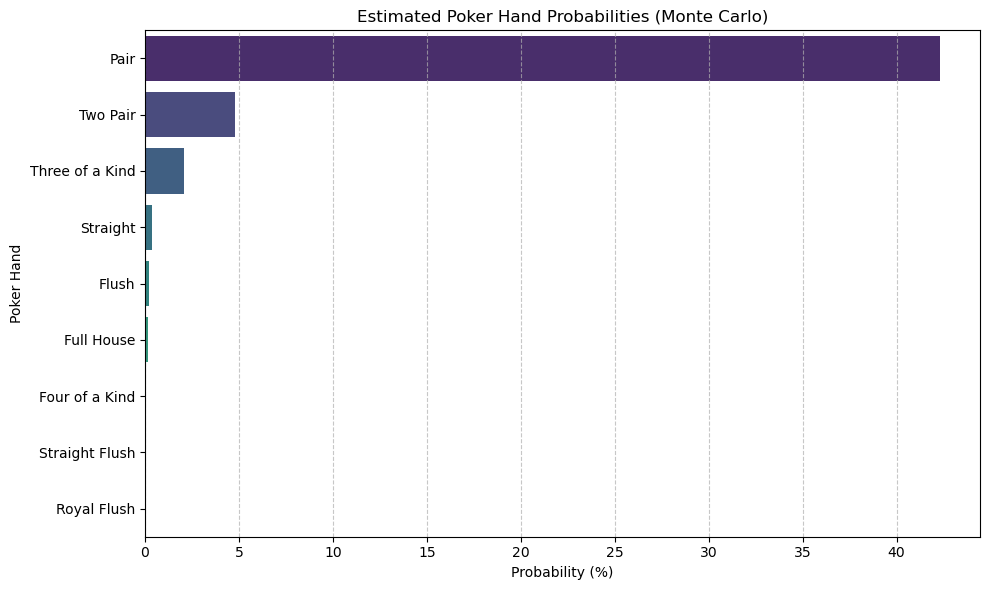

In [95]:
# Graph with Matplotlib / Seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("poker_hand_probs.csv")

# Sort for better view
df = df.sort_values("Probability (%)", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Probability (%)", y="Hand Type", data=df, hue = "Hand Type", palette="viridis", legend=False)
plt.title("Estimated Poker Hand Probabilities (Monte Carlo)")
plt.xlabel("Probability (%)")
plt.ylabel("Poker Hand")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


2025-04-13 13:07:56.055 
  command:

    streamlit run C:\Users\kumar\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


False

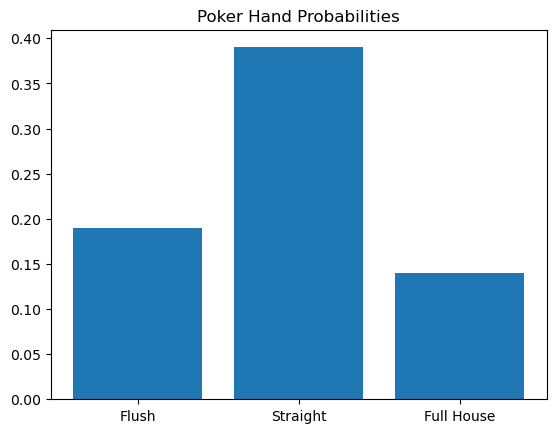

In [101]:
import streamlit as st

import matplotlib.pyplot as plt
from io import BytesIO
import streamlit as st

# 🎨 Create a simple plot (you can replace this with your own Seaborn or Matplotlib plot)
fig, ax = plt.subplots()
ax.bar(["Flush", "Straight", "Full House"], [0.19, 0.39, 0.14])
ax.set_title("Poker Hand Probabilities")

# 💾 Save to a BytesIO buffer
buffer = BytesIO()
fig.savefig(buffer, format="png")  # You can also use "pdf"
buffer.seek(0)

# 📥 Add a Streamlit download button
st.download_button(
    label="Download plot as PNG",
    data=buffer,
    file_name="poker_hand_probabilities.png",
    mime="image/png"
)

